In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.size

10692

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [40]:
df.drop(columns=['Cabin'], inplace=True)

In [41]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-41-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [42]:
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

<ipython-input-42-8a0b17ec3c14>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)


In [43]:
print(df['Parch'].unique())
print(df['SibSp'].unique())

[0 1 2 5 3 4 6]
[1 0 3 4 2 5 8]


In [44]:
df['Family'] = df['Parch'] + df['SibSp']
df.drop(columns= ['Parch', 'SibSp'], inplace=True)

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [46]:
group_1 = df.groupby('Pclass')['Survived'].count()
print(group_1)

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


In [47]:
group_2 = df.groupby('Sex')['Survived'].count()
print(group_2)

Sex
female    314
male      577
Name: Survived, dtype: int64


In [48]:
cols_for_encoding = ['Pclass', 'Sex', 'Embarked']

df = pd.get_dummies(df, columns=cols_for_encoding, drop_first=True, dtype=int)

In [49]:
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,1,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,0,0,1,1,0,1


In [50]:
from sklearn.preprocessing import StandardScaler

clols_to_scale = ['Fare', 'Age']
scaler = StandardScaler()
df[clols_to_scale] = scaler.fit_transform(df[clols_to_scale])
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",-0.565736,A/5 21171,-0.502445,1,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,PC 17599,0.786845,1,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",-0.258337,STON/O2. 3101282,-0.488854,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,113803,0.420730,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0.433312,373450,-0.486337,0,0,1,1,0,1


In [51]:
df = df.drop(columns=['Name', 'Ticket', 'PassengerId'])

In [52]:
df.head()

,Survived,Age,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,-0.565736,-0.502445,1,0,1,1,0,1
1,1,0.663861,0.786845,1,0,0,0,0,0
2,1,-0.258337,-0.488854,0,0,1,0,0,1
3,1,0.433312,0.420730,1,0,0,0,0,1
4,0,0.433312,-0.486337,0,0,1,1,0,1


**Feature Importance**

In [53]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:

from sklearn.ensemble import RandomForestClassifier
# Train a RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [55]:
# Random Forest
feature_importances = rf.feature_importances_

# Print feature importances
feature_importances

array([0.25933649, 0.28646472, 0.07982146, 0.016324  , 0.05926795,
       0.2660242 , 0.00922937, 0.02353182])

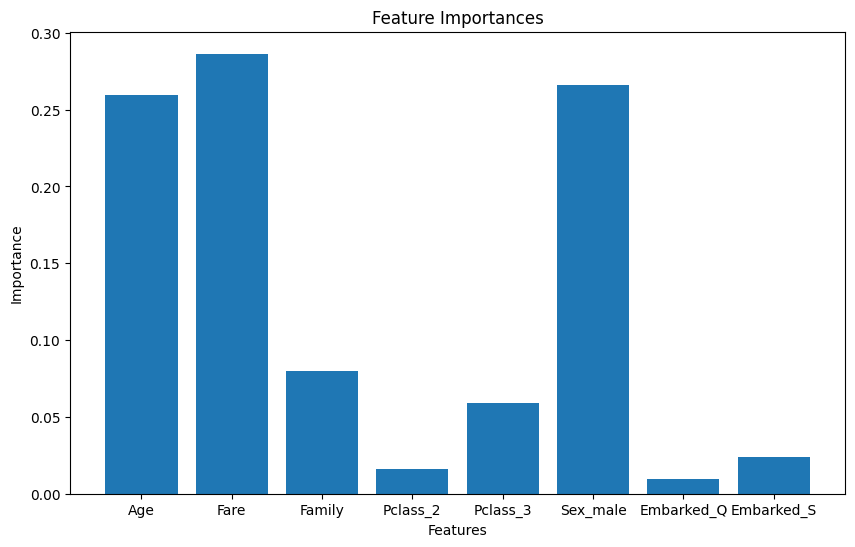

In [56]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X_train.columns)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [57]:
!pip install boruta

In [58]:
#Boruta
from boruta import BorutaPy

# Create a Boruta feature selection object
boruta = BorutaPy(rf, n_estimators='auto', random_state=42)

# Fit Boruta
boruta.fit(X.values, y.values)

# Get results
print("Confirmed features:")
print(X.columns[boruta.support_])
print("Tentative features:")
print(X.columns[boruta.support_weak_])


Confirmed features:
Index(['Age', 'Fare', 'Sex_male'], dtype='object')
Tentative features:
Index([], dtype='object')
